# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
def pdisplay(df , columns = None):
    if isinstance(df , pd.DataFrame):
        display(df)
    elif columns is None:
        display(pd.DataFrame(df))
    else:
        display(pd.DataFrame(df , columns = columns))

# Import Data

In [3]:
data = pd.read_csv('../data/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Feature(X) & Target(y)

In [4]:
ydata = data['HeartDisease']
Xdata = data.drop('HeartDisease' , axis = 1)

print()
display(Xdata.head())
pdisplay(ydata.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


,HeartDisease
0,0
1,1
2,0
3,1
4,0


# Data Analyzing

In [5]:
pdisplay(data.isnull().sum() , ['null count'])

,null count
Age,0
Sex,0
ChestPainType,2
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,3
Oldpeak,0


## Xdata

In [6]:
pdisplay(Xdata.dtypes , ['Xdata dtypes'])

,Xdata dtypes
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [7]:
object_cols = Xdata.dtypes.index[Xdata.dtypes == 'object']
num_cols = Xdata.dtypes.index[Xdata.dtypes != 'object']

print("object_cols =\n",object_cols)
print("num_cols =\n" , num_cols)

object_cols =
 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
num_cols =
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


### Numerical Data

In [8]:
Xdata[num_cols].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [9]:
pdisplay(Xdata[num_cols].isnull().sum() , ['null count'])

,null count
Age,0
RestingBP,0
Cholesterol,0
FastingBS,0
MaxHR,0
Oldpeak,0


### Categorical

In [10]:
for col_inx in object_cols:
    pdisplay(Xdata[col_inx].value_counts())

,count
Sex,
M,725
F,193


,count
ChestPainType,
ASY,495
NAP,203
ATA,172
TA,46


,count
RestingECG,
Normal,552
LVH,188
ST,178


,count
ExerciseAngina,
N,544
Y,371


,count
ST_Slope,
Flat,460
Up,395
Down,63


In [11]:
Xdata[object_cols].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,916,918,915,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,495,552,544,460


In [12]:
pdisplay(Xdata[object_cols].isnull().sum() , ['null count'])

,null count
Sex,0
ChestPainType,2
RestingECG,0
ExerciseAngina,3
ST_Slope,0


# Identify Issues in the Dataset

- *Explain Here*

# Data visualization

In [13]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


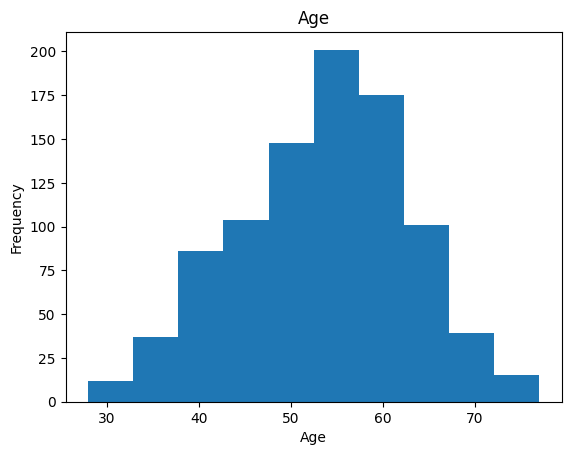

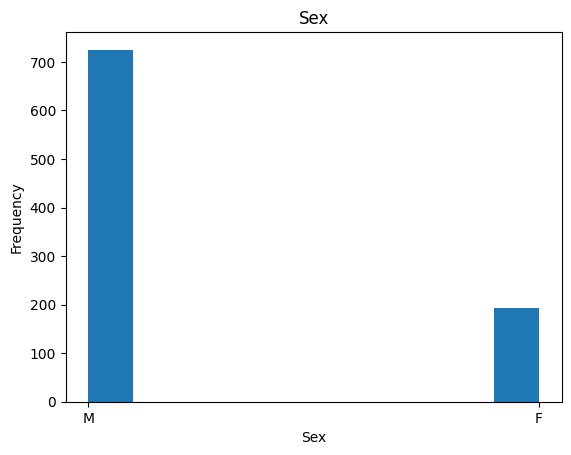

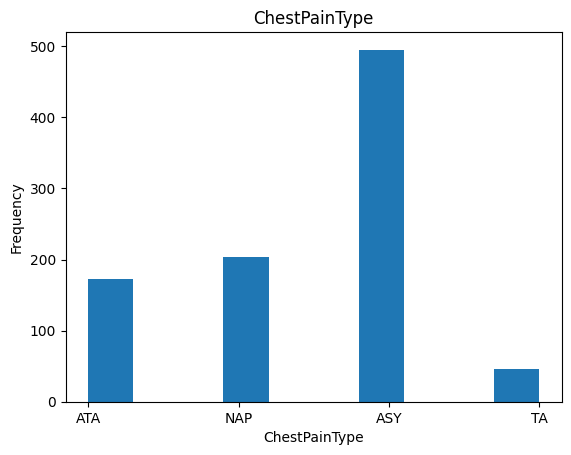

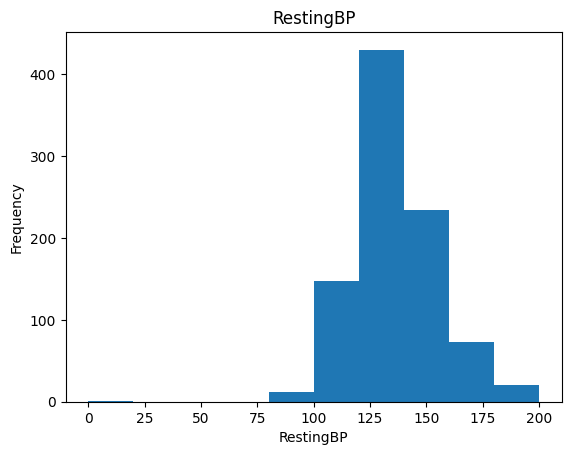

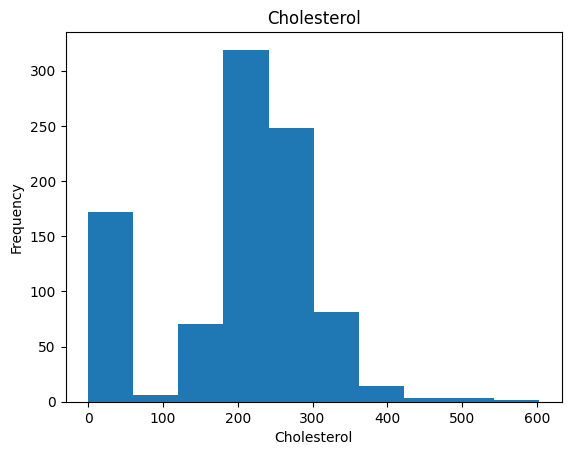

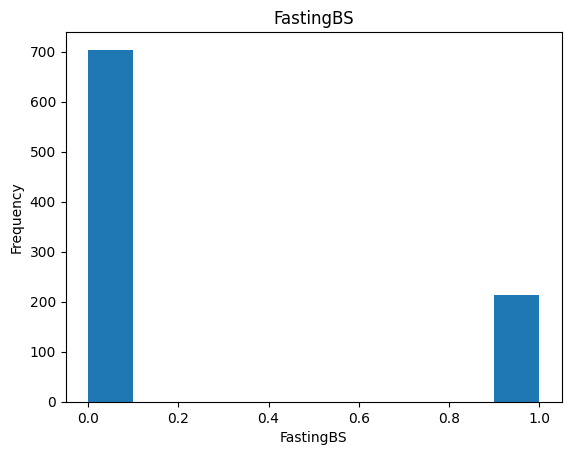

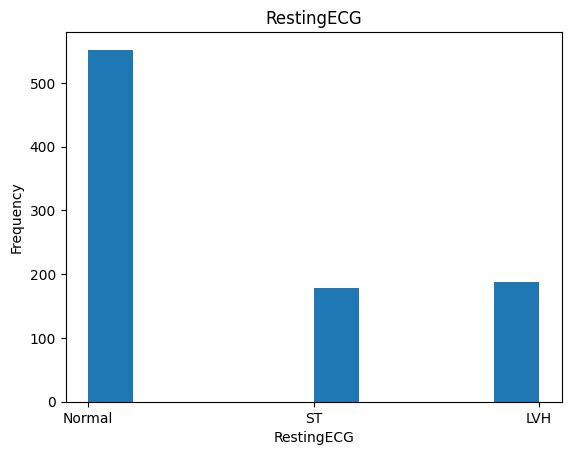

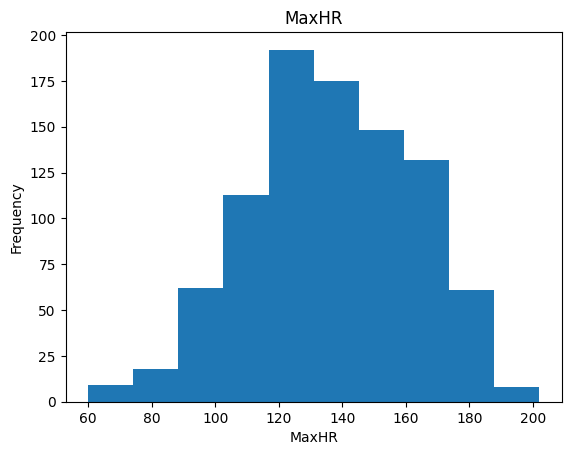

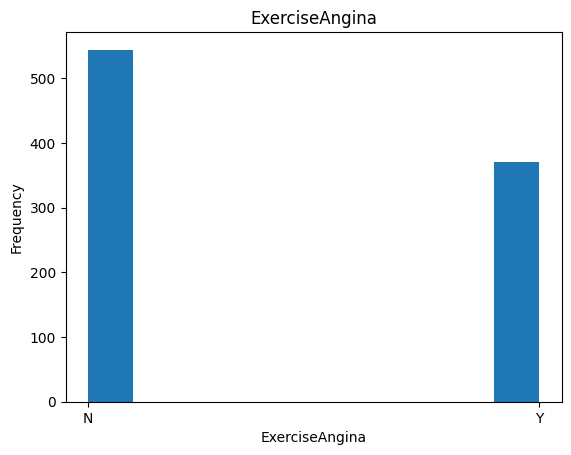

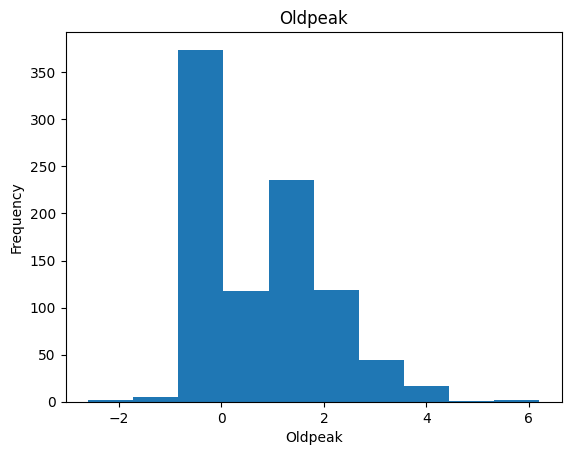

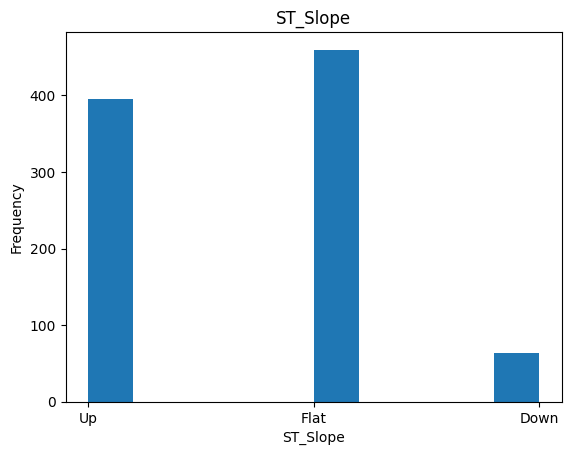

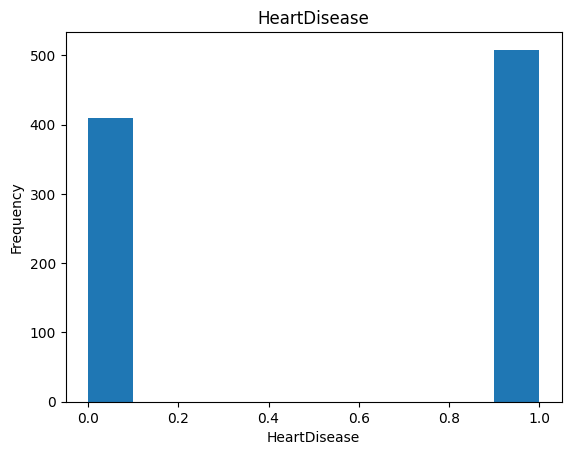

In [25]:
for c in data.columns:
    plt.hist(data[c].dropna())
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.title(c)
    plt.show()

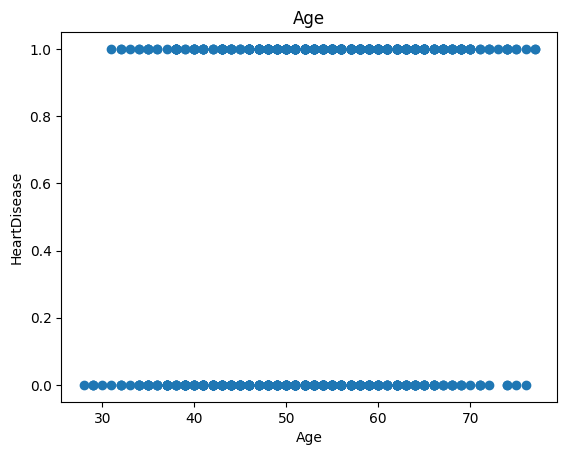

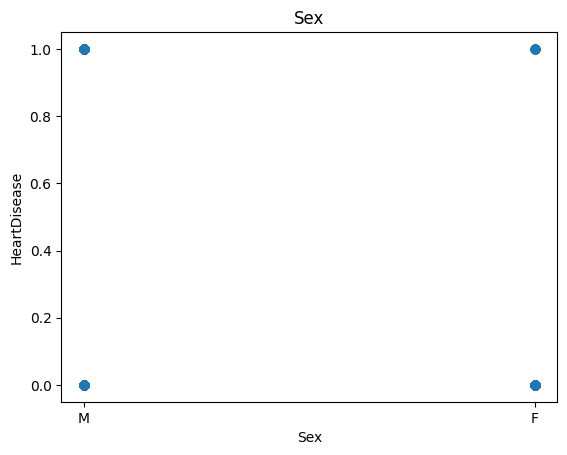

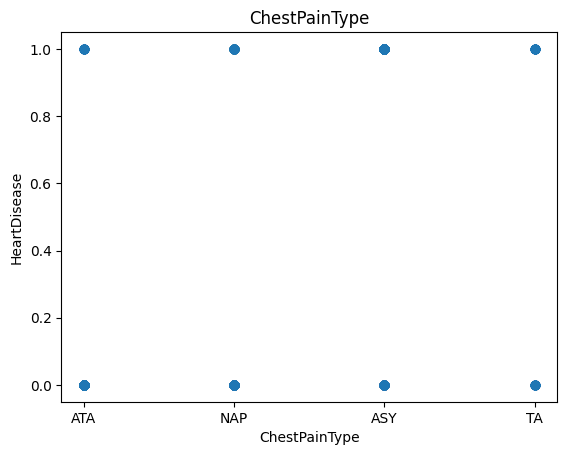

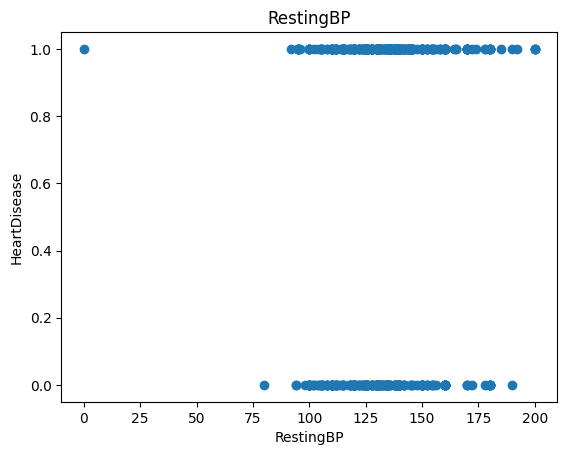

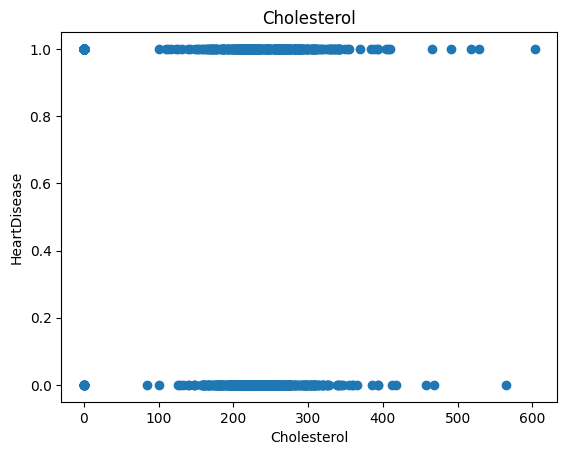

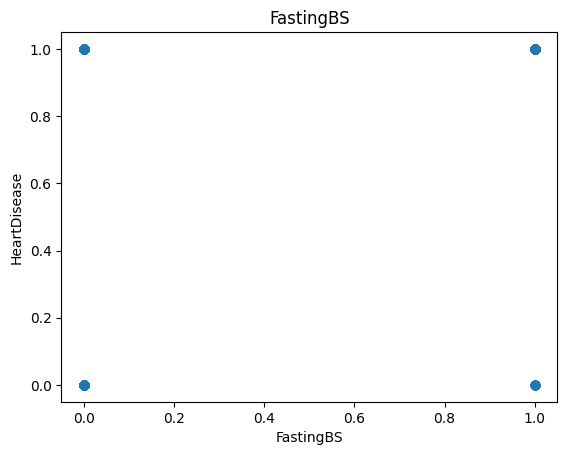

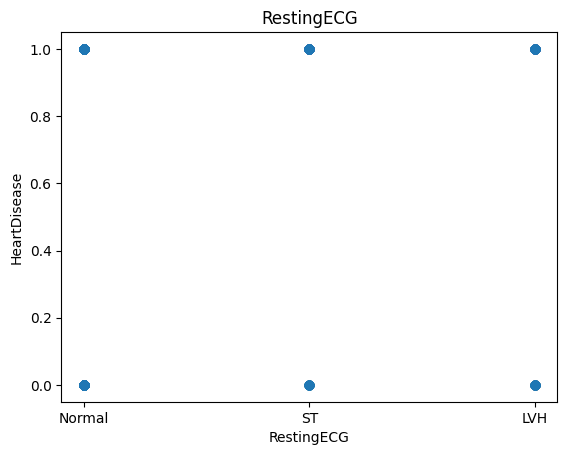

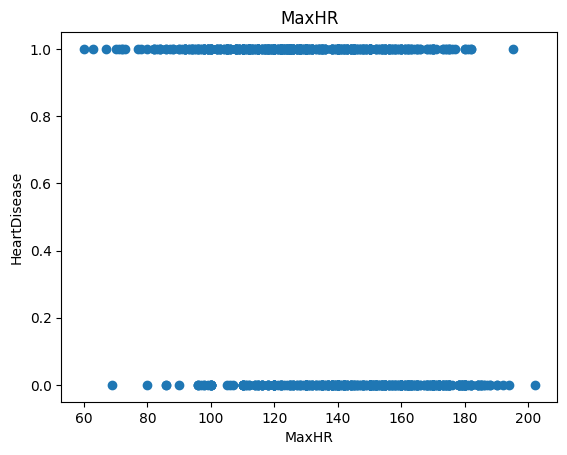

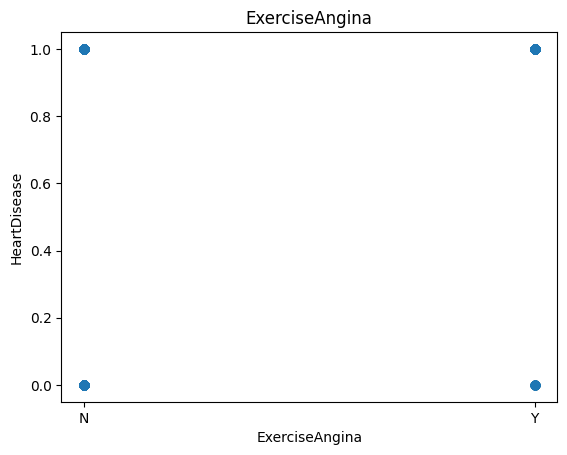

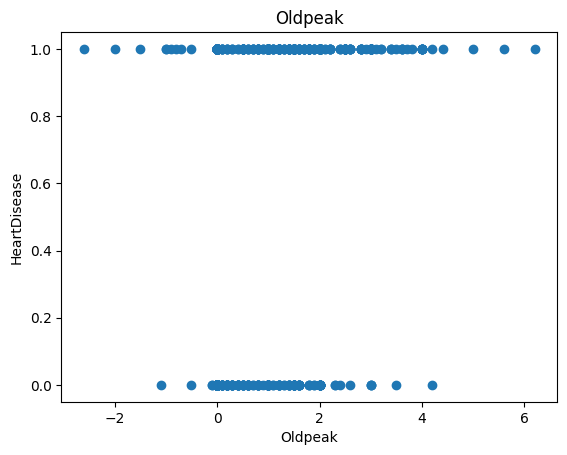

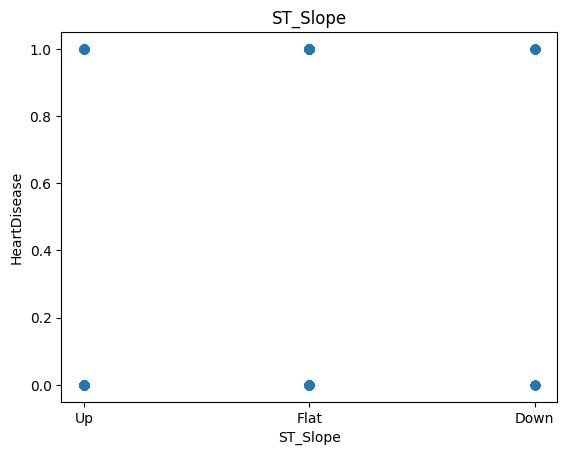

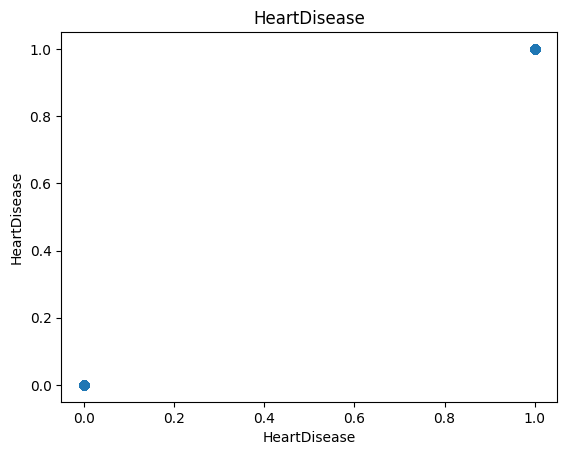

In [28]:
# draw 2-d distribution and ignore missing values
data_na = data.dropna()
ydata_na = data_na['HeartDisease']
for c in data.columns:
    plt.scatter(data_na[c] , ydata_na)
    plt.xlabel(c)
    plt.ylabel('HeartDisease')
    plt.title(c)
    plt.show()

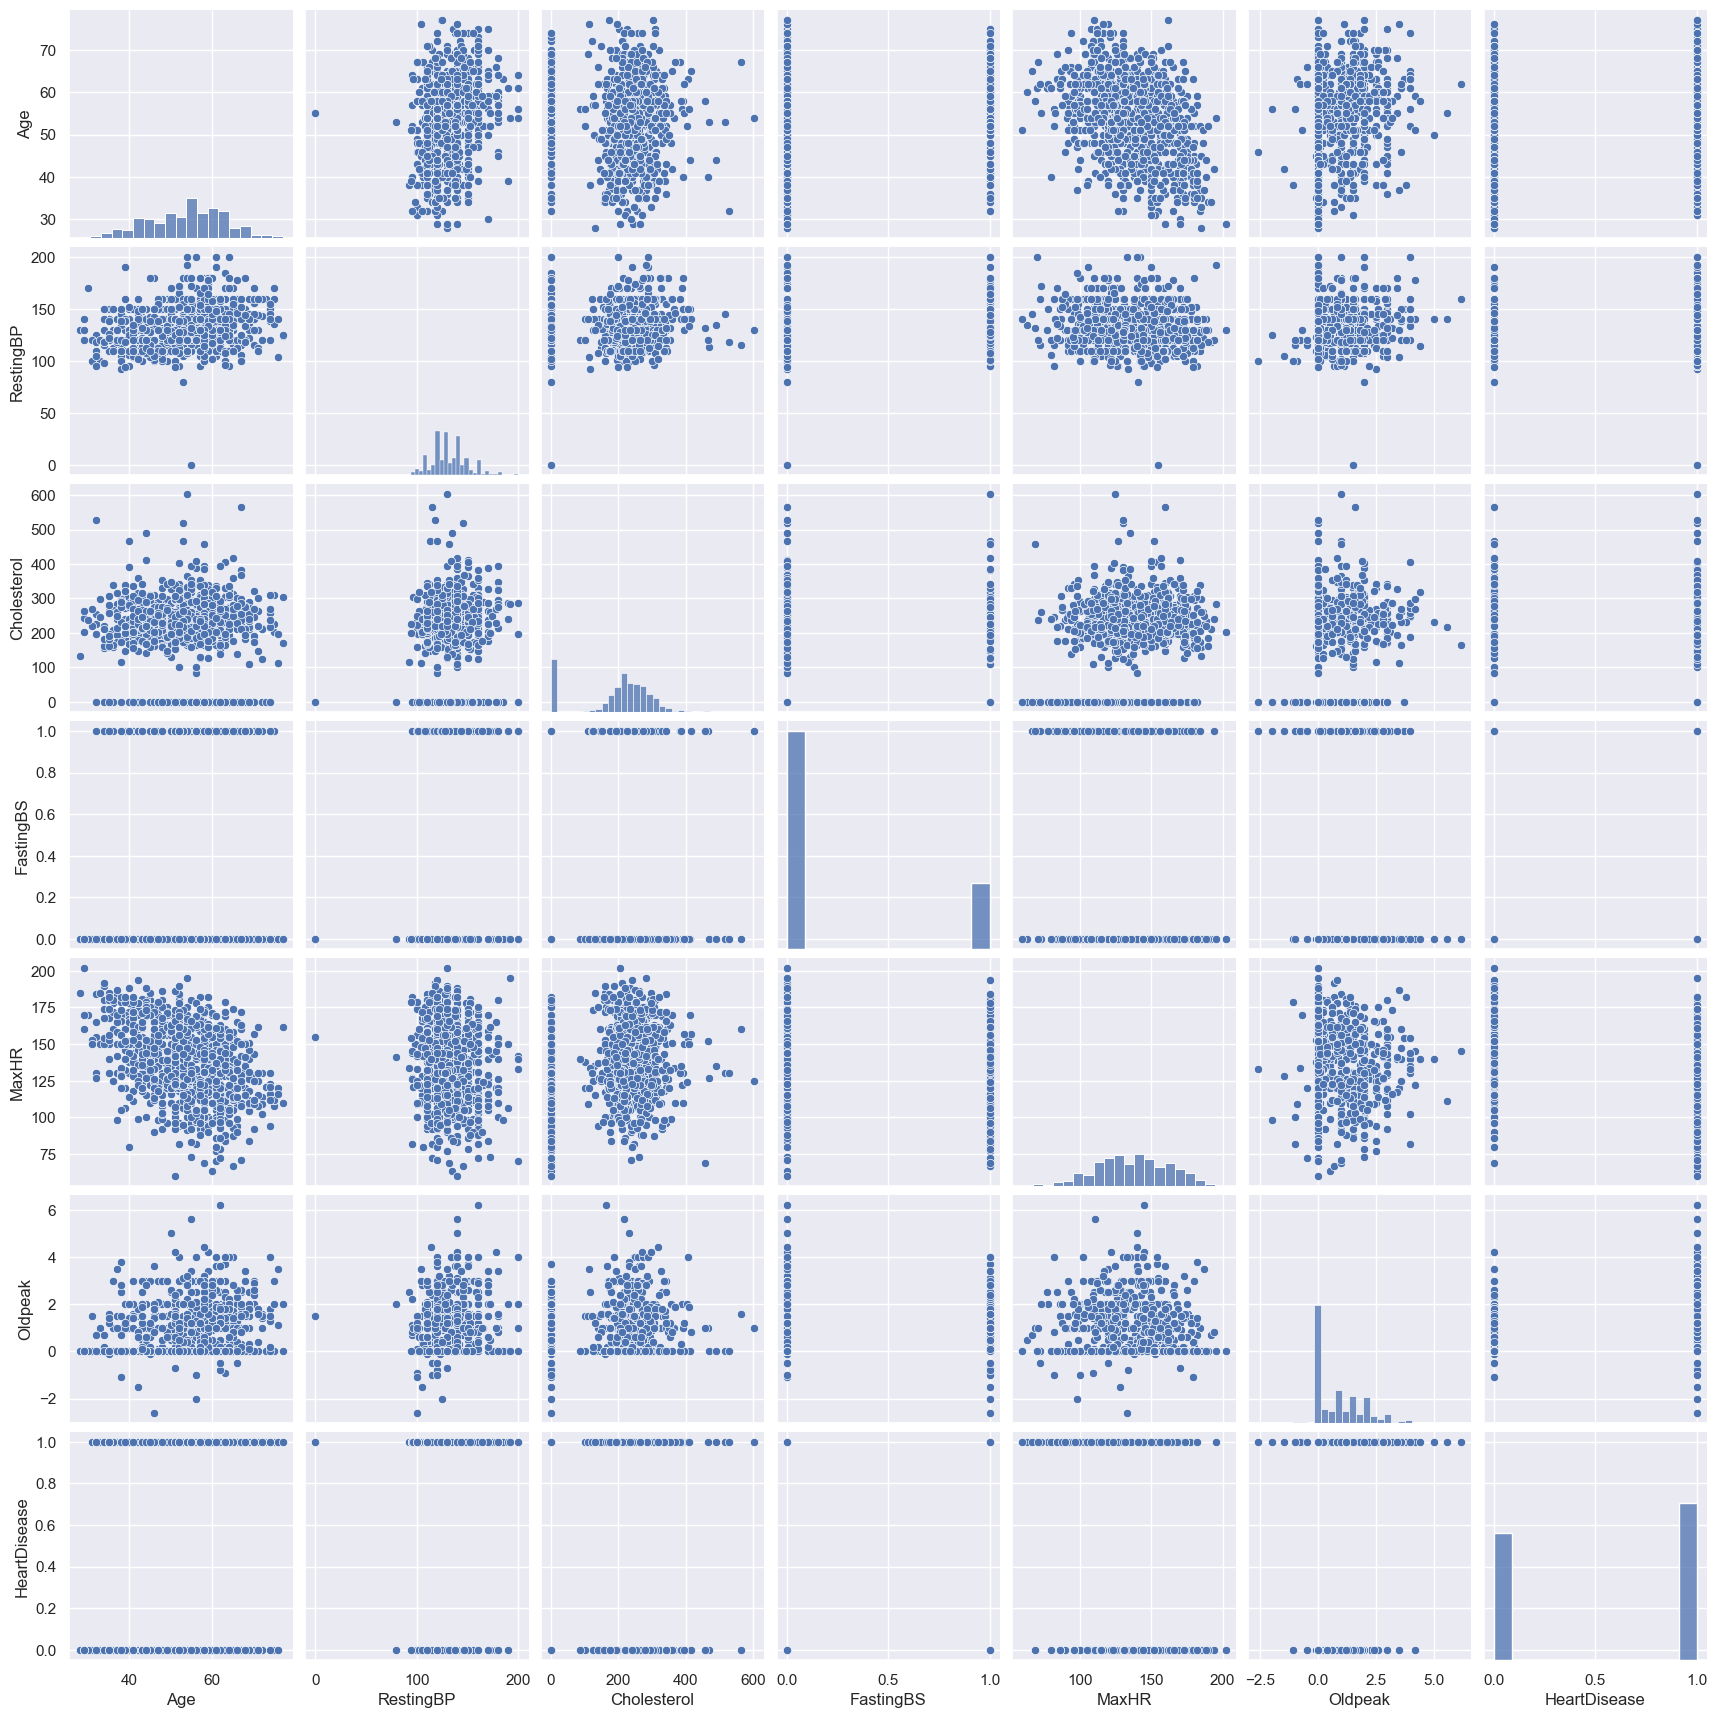

In [31]:
# Draw 2d pair plot
# set figure size
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(data_na)

<Axes: >

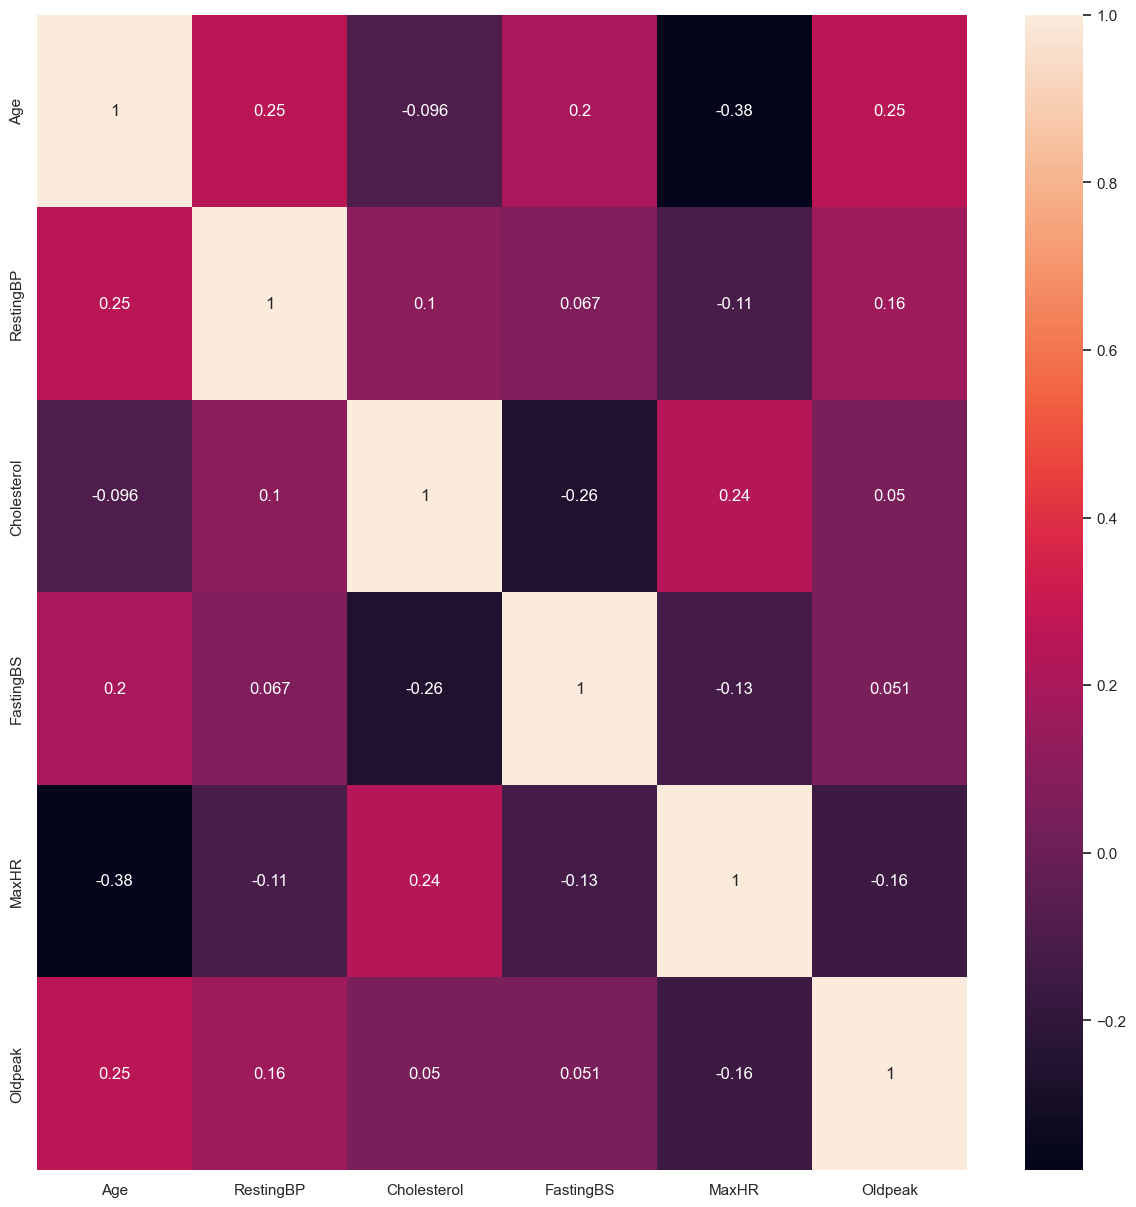

In [37]:
# Draw correlation heatmap
sns.heatmap(data_na[num_cols].corr() , annot=True)

# Removing Irrelevant Reatures

# Convert Categorical to Numerical

# Missing Data Handling